# Product Demand Prediction

A product company plans to offer discounts on its product during the upcoming holiday season. The company wants to find the price at which its product can be a better deal compared to its competitors. For this task, the company provided a dataset of past changes in sales based on price changes. You need to train a model that can predict the demand for the product in the market with different price segments.

### Dataset

*    the product id;
*    store id;
*    total price at which product was sold;
*    base price at which product was sold;
*    Units sold (quantity demanded);

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/demand.csv")

## EDA - Exploratory Data Analysis

In [4]:
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [5]:
df.shape

(150150, 5)

In [6]:
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [7]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [8]:
df.isnull().sum()   

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
def corr_sort(data, column):
    return abs(data.corr(numeric_only=True)[column]).sort_values(ascending=False)

corr_sort(df, 'Units Sold')  

Units Sold     1.000000
Total Price    0.235625
Base Price     0.140022
ID             0.010608
Store ID       0.004369
Name: Units Sold, dtype: float64

## Data Visualization

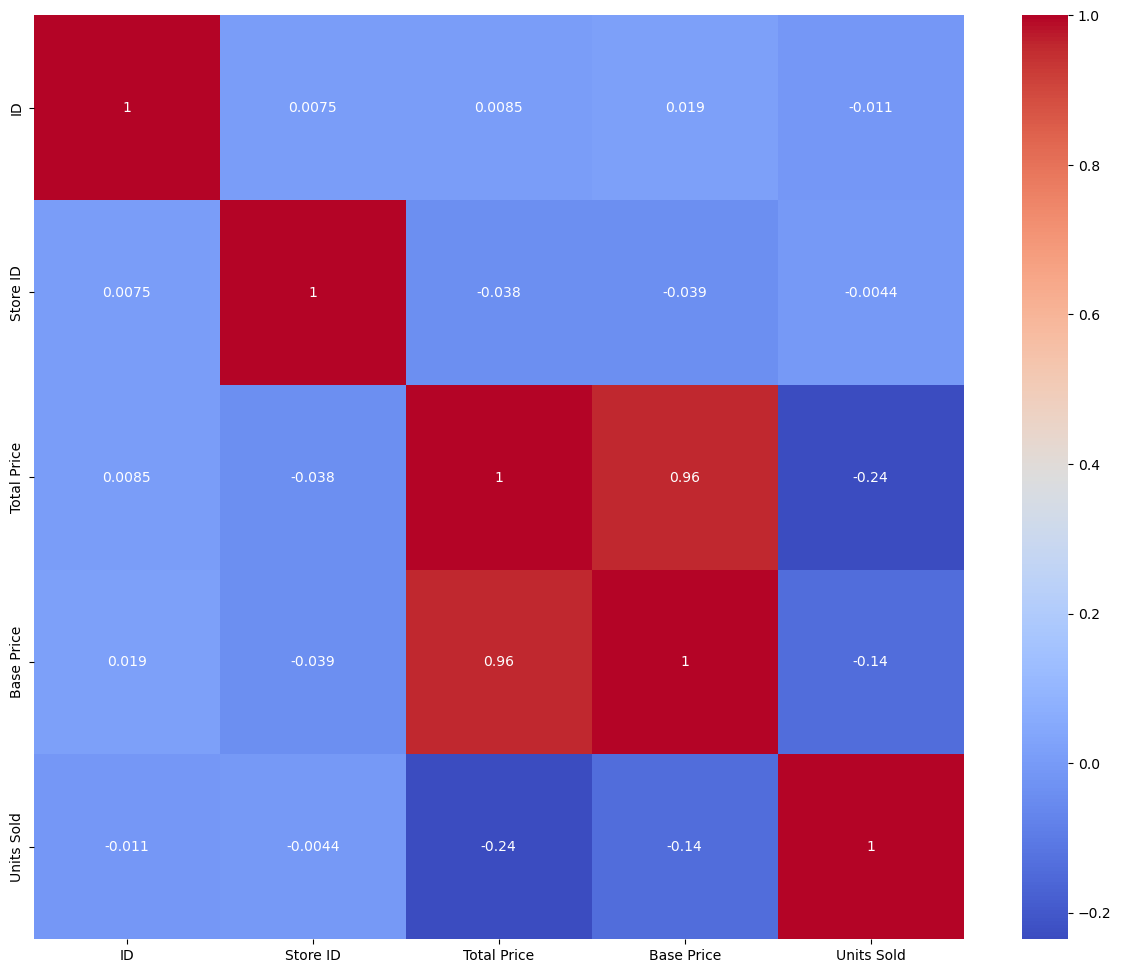

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(method='pearson'), cmap="coolwarm", annot=True)
plt.show()

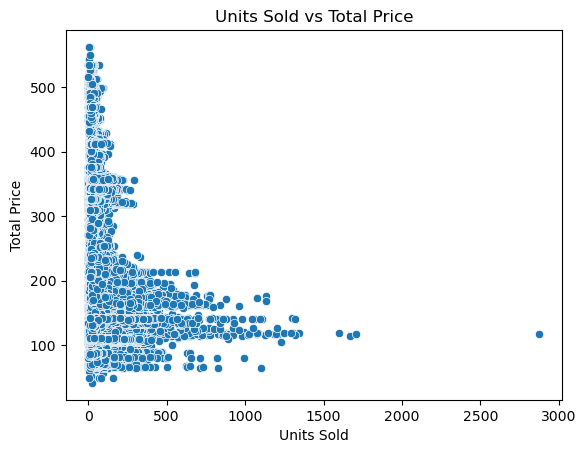

In [12]:
sns.scatterplot(x='Units Sold', y='Total Price', data=df)
plt.title('Units Sold vs Total Price');

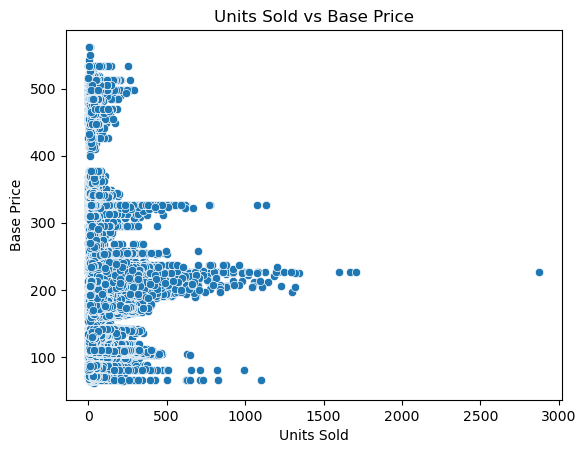

In [13]:
sns.scatterplot(x='Units Sold', y='Base Price', data=df)
plt.title('Units Sold vs Base Price');

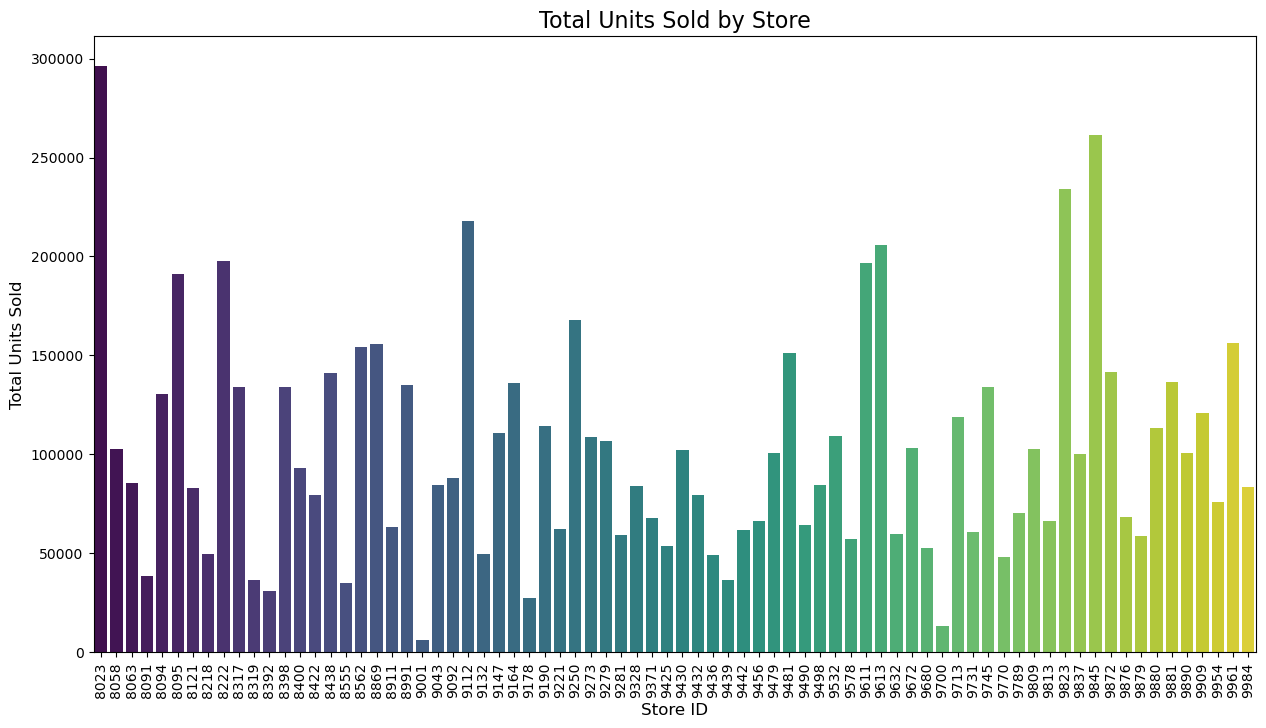

In [14]:
store_sales = df.groupby('Store ID')['Units Sold'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='Store ID', y='Units Sold', data=store_sales, palette='viridis')
plt.title('Total Units Sold by Store', fontsize=16)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Modelling

In [15]:
x = df[['Total Price', 'Base Price']]
y = df['Units Sold']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = model.predict(x_test)

In [30]:
r2_score(y_test, y_pred)

0.3790666578911601

In [31]:
features = np.array([[133.00, 140.00]])
model.predict(features) 

array([27.])

In [33]:
model = DecisionTreeRegressor()
model.fit(x, y)

DecisionTreeRegressor()

In [37]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']

In [2]:
import sklearn
print(sklearn.__version__)
import joblib
print(joblib.__version__)
import numpy
print(numpy.__version__)

1.2.2
1.2.0
1.23.5
